In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
data = data.rename(columns={' BMI ': 'BMI', 'Life expectancy ':'Life_expectancy','Adult Mortality':'Adult_Mortality', 'infant deaths':'infant_deaths','under-five deaths ': 'under_five_deaths',
  'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'Hepatitis_B',  'Measles ': 'Measles', 'Total expenditure':'Total_expenditure',' HIV/AIDS':'HIV_AIDS',' thinness  1-19 years':'thinness_1_19_years',
  ' thinness 5-9 years':'thinness_5_9_years', 'Income composition of resources':'Income_composition_of_resources', 'Diphtheria ':'Diphtheria'
})

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [7]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [8]:
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [9]:
data.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [11]:
data.isnull().mean().sort_values(ascending = False)

Population                         0.221920
Hepatitis_B                        0.188223
GDP                                0.152485
Total_expenditure                  0.076923
Alcohol                            0.066031
Income_composition_of_resources    0.056841
Schooling                          0.055480
BMI                                0.011572
thinness_1_19_years                0.011572
thinness_5_9_years                 0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult_Mortality                    0.003404
Life_expectancy                    0.003404
under_five_deaths                  0.000000
HIV_AIDS                           0.000000
Measles                            0.000000
percentage_expenditure             0.000000
infant_deaths                      0.000000
Status                             0.000000
Year                               0.000000
Country                            0.000000
dtype: float64

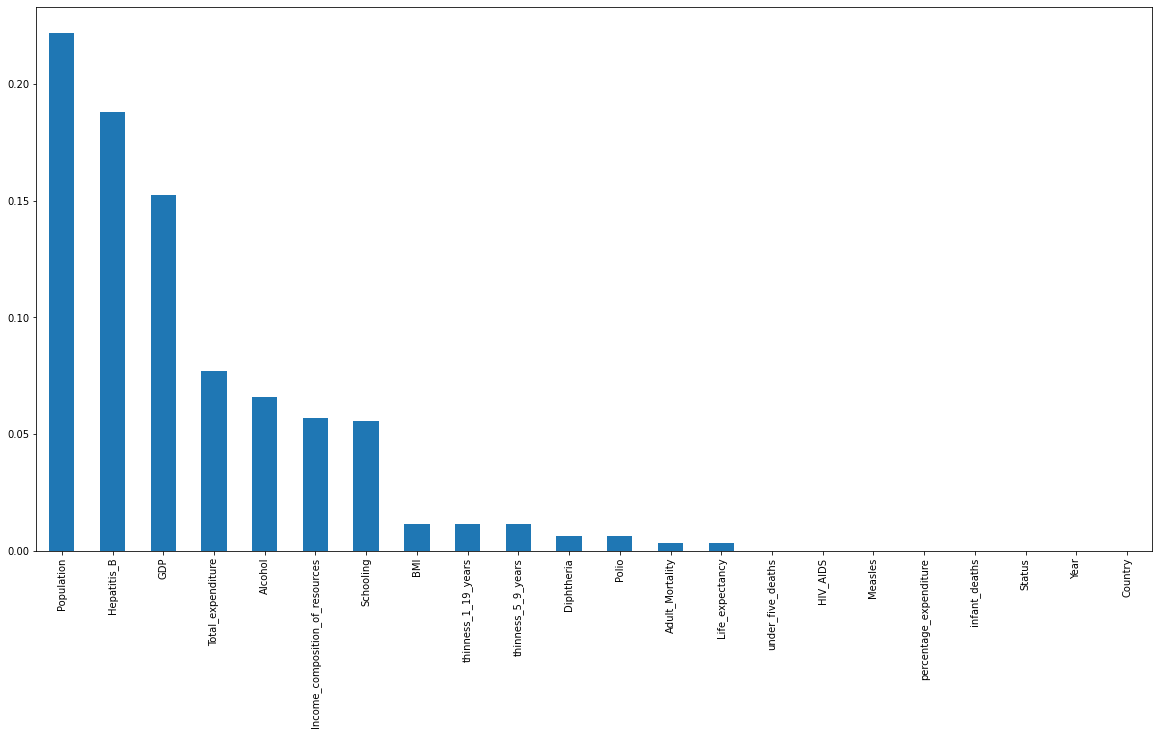

In [12]:
data.isnull().mean().sort_values(ascending = False).plot(kind = 'bar',figsize = (20,10))

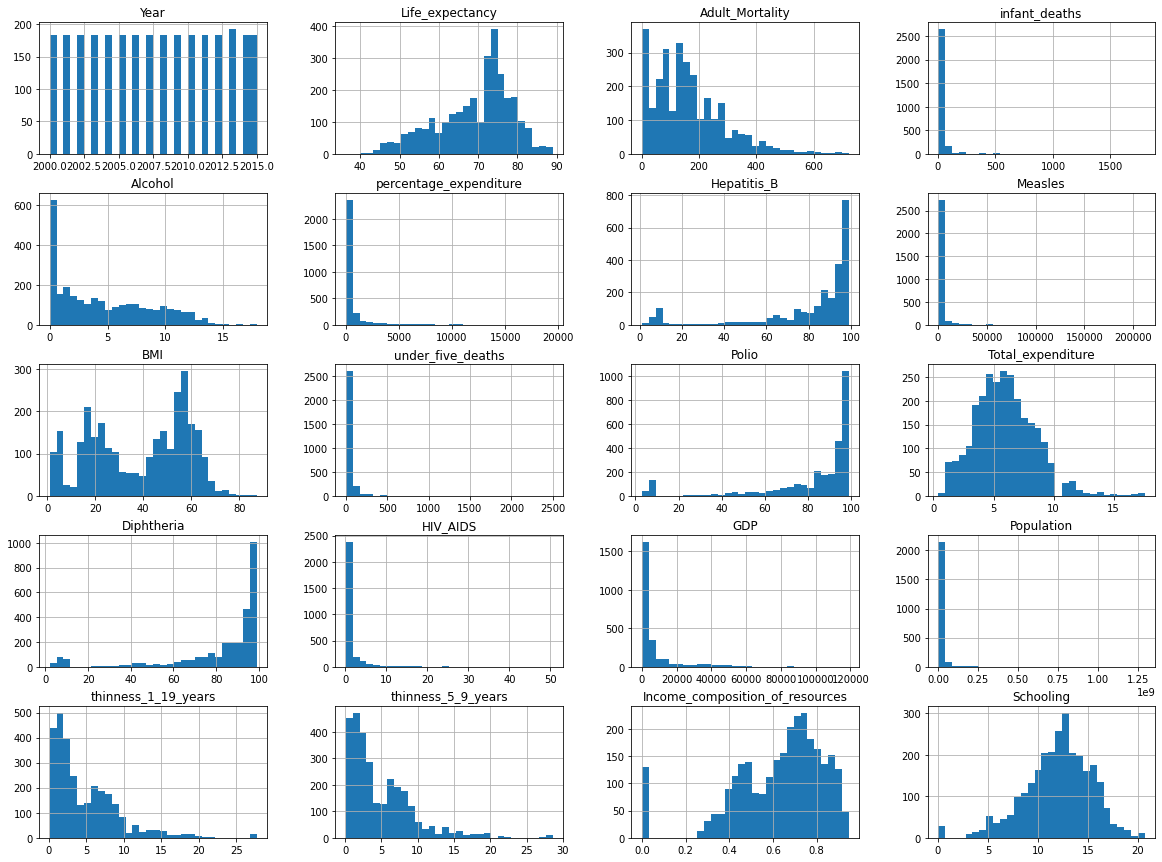

In [13]:
data.hist(bins=30,figsize=(20,15))
plt.show()

In [14]:
data_missing = data.copy()

Ta có thể thấy Population,Hepatitis_B, GDP tỷ lệ khuyết khả cả 0.15-0.2 và các phân phối dạt qua 2 bên ta có thể gán giá trị ngẫu nhiễn hoặc đuổi phân phối

In [15]:
data_missing['Population'] = data['Population'].fillna(0)

In [16]:
data_missing['Hepatitis_B'] = data['Hepatitis_B'].fillna(0)

In [17]:
data_missing['GDP'] = data['GDP'].fillna(-60)

In [18]:
data_missing['Alcohol'] = data['Alcohol'].fillna(0)

In [19]:
def plot_kde(data1,data2,variable):
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(111)
  data1[variable].plot(kind = 'kde',color = 'red',ax = ax,label = variable + '_impute')
  data2[variable].plot(kind = 'kde',color = 'blue',ax = ax, label = variable+ '_missing')
  plt.xlabel(variable)
  plt.legend()
  plt.show()

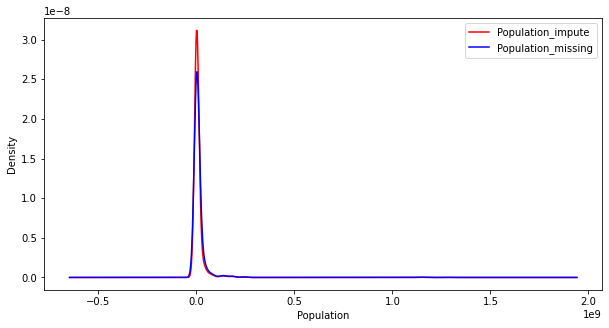

In [20]:
plot_kde(data_missing,data,'Population')

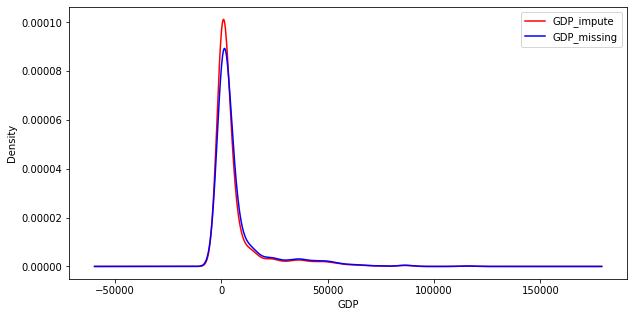

In [21]:
plot_kde(data_missing,data,'GDP')

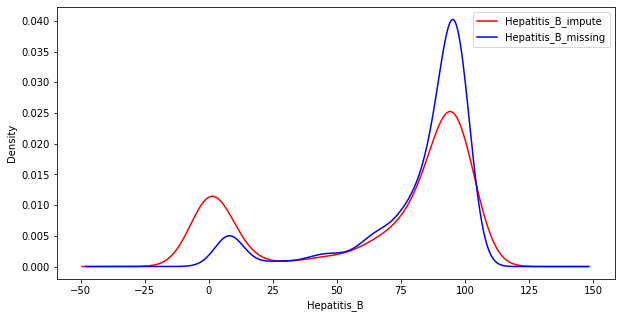

In [22]:
plot_kde(data_missing,data,'Hepatitis_B')

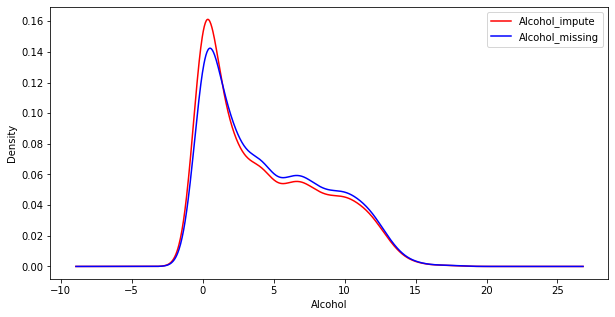

In [23]:
plot_kde(data_missing,data,'Alcohol')

In [24]:
median = data_missing['Total_expenditure'].median()
data_missing['Total_expenditure'] = data['Total_expenditure'].fillna(median)

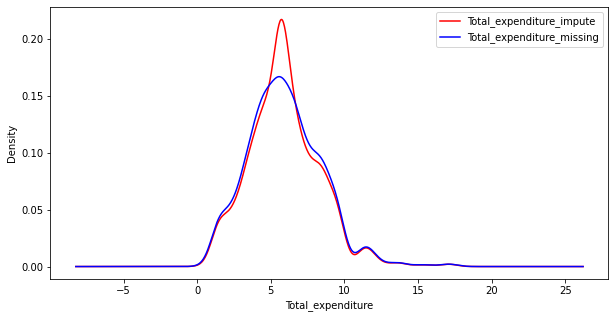

In [25]:
plot_kde(data_missing,data,'Total_expenditure')

In [26]:
median = data_missing['Income_composition_of_resources'].median()
mean = data_missing['Schooling'].mean()
data_missing['Income_composition_of_resources'] = data['Income_composition_of_resources'].fillna(median)
data_missing['Schooling'] = data['Schooling'].fillna(mean)

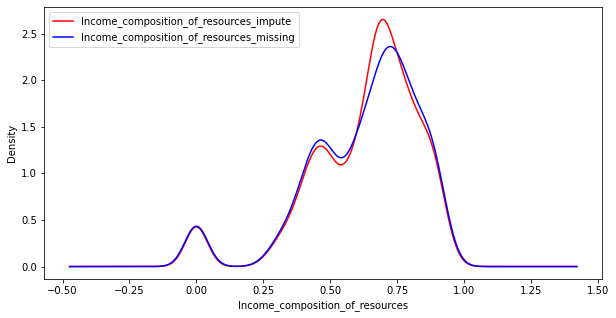

In [27]:
plot_kde(data_missing,data,'Income_composition_of_resources')

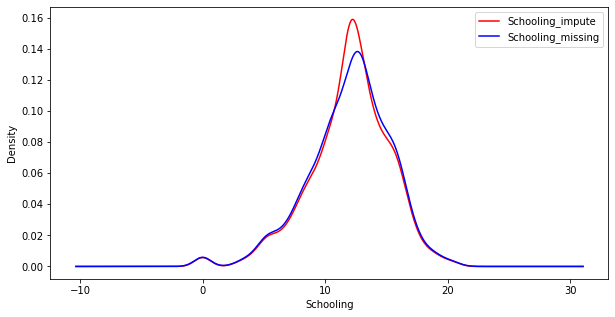

In [28]:
plot_kde(data_missing,data,'Schooling')

In [29]:
mean = data_missing['BMI'].mean()
data_missing['BMI'] = data['BMI'].fillna(mean)

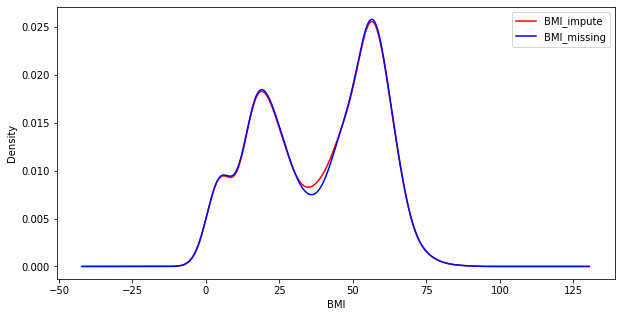

In [30]:
plot_kde(data_missing,data,'BMI')

In [31]:
mean = data['thinness_1_19_years'].mean()
data_missing['thinness_1_19_years'] = data['thinness_1_19_years'].fillna(mean)

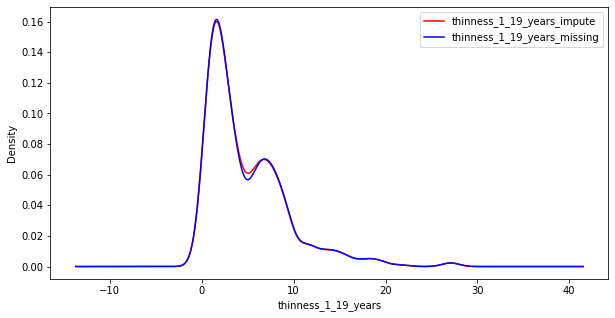

In [32]:
plot_kde(data_missing,data,'thinness_1_19_years')

In [33]:
mean = data['thinness_5_9_years'].mean()
data_missing['thinness_5_9_years'] = data['thinness_5_9_years'].fillna(mean)

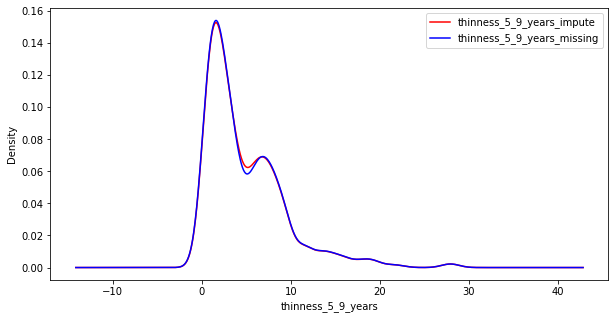

In [34]:
plot_kde(data_missing,data,'thinness_5_9_years')

In [35]:
data_missing['Diphtheria'] = data_missing['Diphtheria'].fillna(0)
data_missing['Polio'] = data['Polio'].fillna(0)

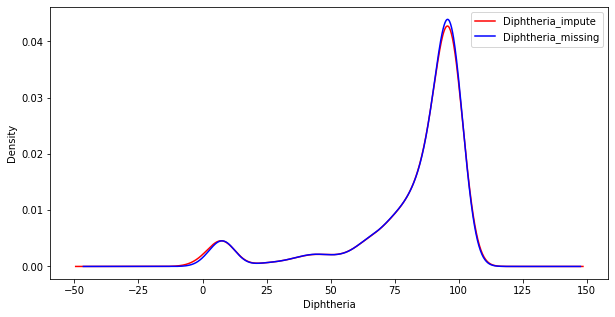

In [36]:
plot_kde(data_missing,data,'Diphtheria')

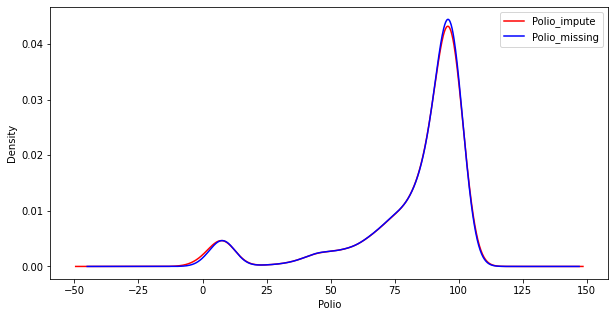

In [37]:
plot_kde(data_missing,data,'Polio')

In [38]:
median = data['Adult_Mortality'].median()
data_missing['Adult_Mortality'] = data['Adult_Mortality'].fillna(median)
median = data['Life_expectancy'].median()
data_missing['Life_expectancy'] = data['Life_expectancy'].fillna(median)

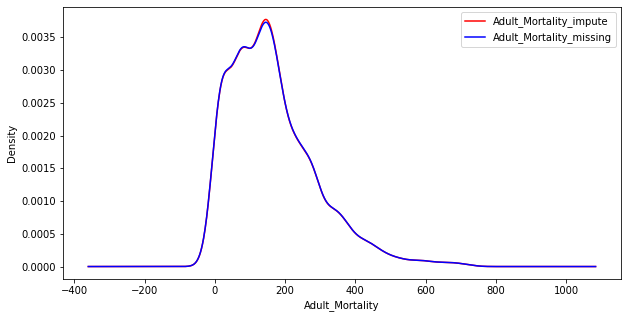

In [39]:
plot_kde(data_missing,data,'Adult_Mortality')

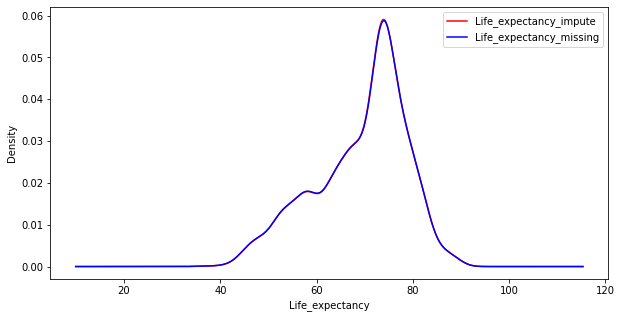

In [40]:
plot_kde(data_missing,data,'Life_expectancy')

In [41]:
data_missing.isnull().mean()

Country                            0.0
Year                               0.0
Status                             0.0
Life_expectancy                    0.0
Adult_Mortality                    0.0
infant_deaths                      0.0
Alcohol                            0.0
percentage_expenditure             0.0
Hepatitis_B                        0.0
Measles                            0.0
BMI                                0.0
under_five_deaths                  0.0
Polio                              0.0
Total_expenditure                  0.0
Diphtheria                         0.0
HIV_AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness_1_19_years                0.0
thinness_5_9_years                 0.0
Income_composition_of_resources    0.0
Schooling                          0.0
dtype: float64

In [42]:
data_missing.tail()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [43]:
data_encoding = data_missing.copy()

In [44]:
data_encoding.groupby(['Country'])['Life_expectancy'].mean().sort_values(ascending = True)

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
                              ...   
France                      82.21875
Switzerland                 82.33125
Iceland                     82.44375
Sweden                      82.51875
Japan                       82.53750
Name: Life_expectancy, Length: 193, dtype: float64

In [45]:
data_encoding.groupby(['Status'])['Life_expectancy'].mean().sort_values(ascending = False)

Status
Developed     79.197852
Developing    67.132028
Name: Life_expectancy, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_encoding.drop('Life_expectancy',axis = 1),data_encoding['Life_expectancy'],test_size = 0.2,random_state=0)

Ta có thể thấy rằng một số nhãn hiểm xuất hiện

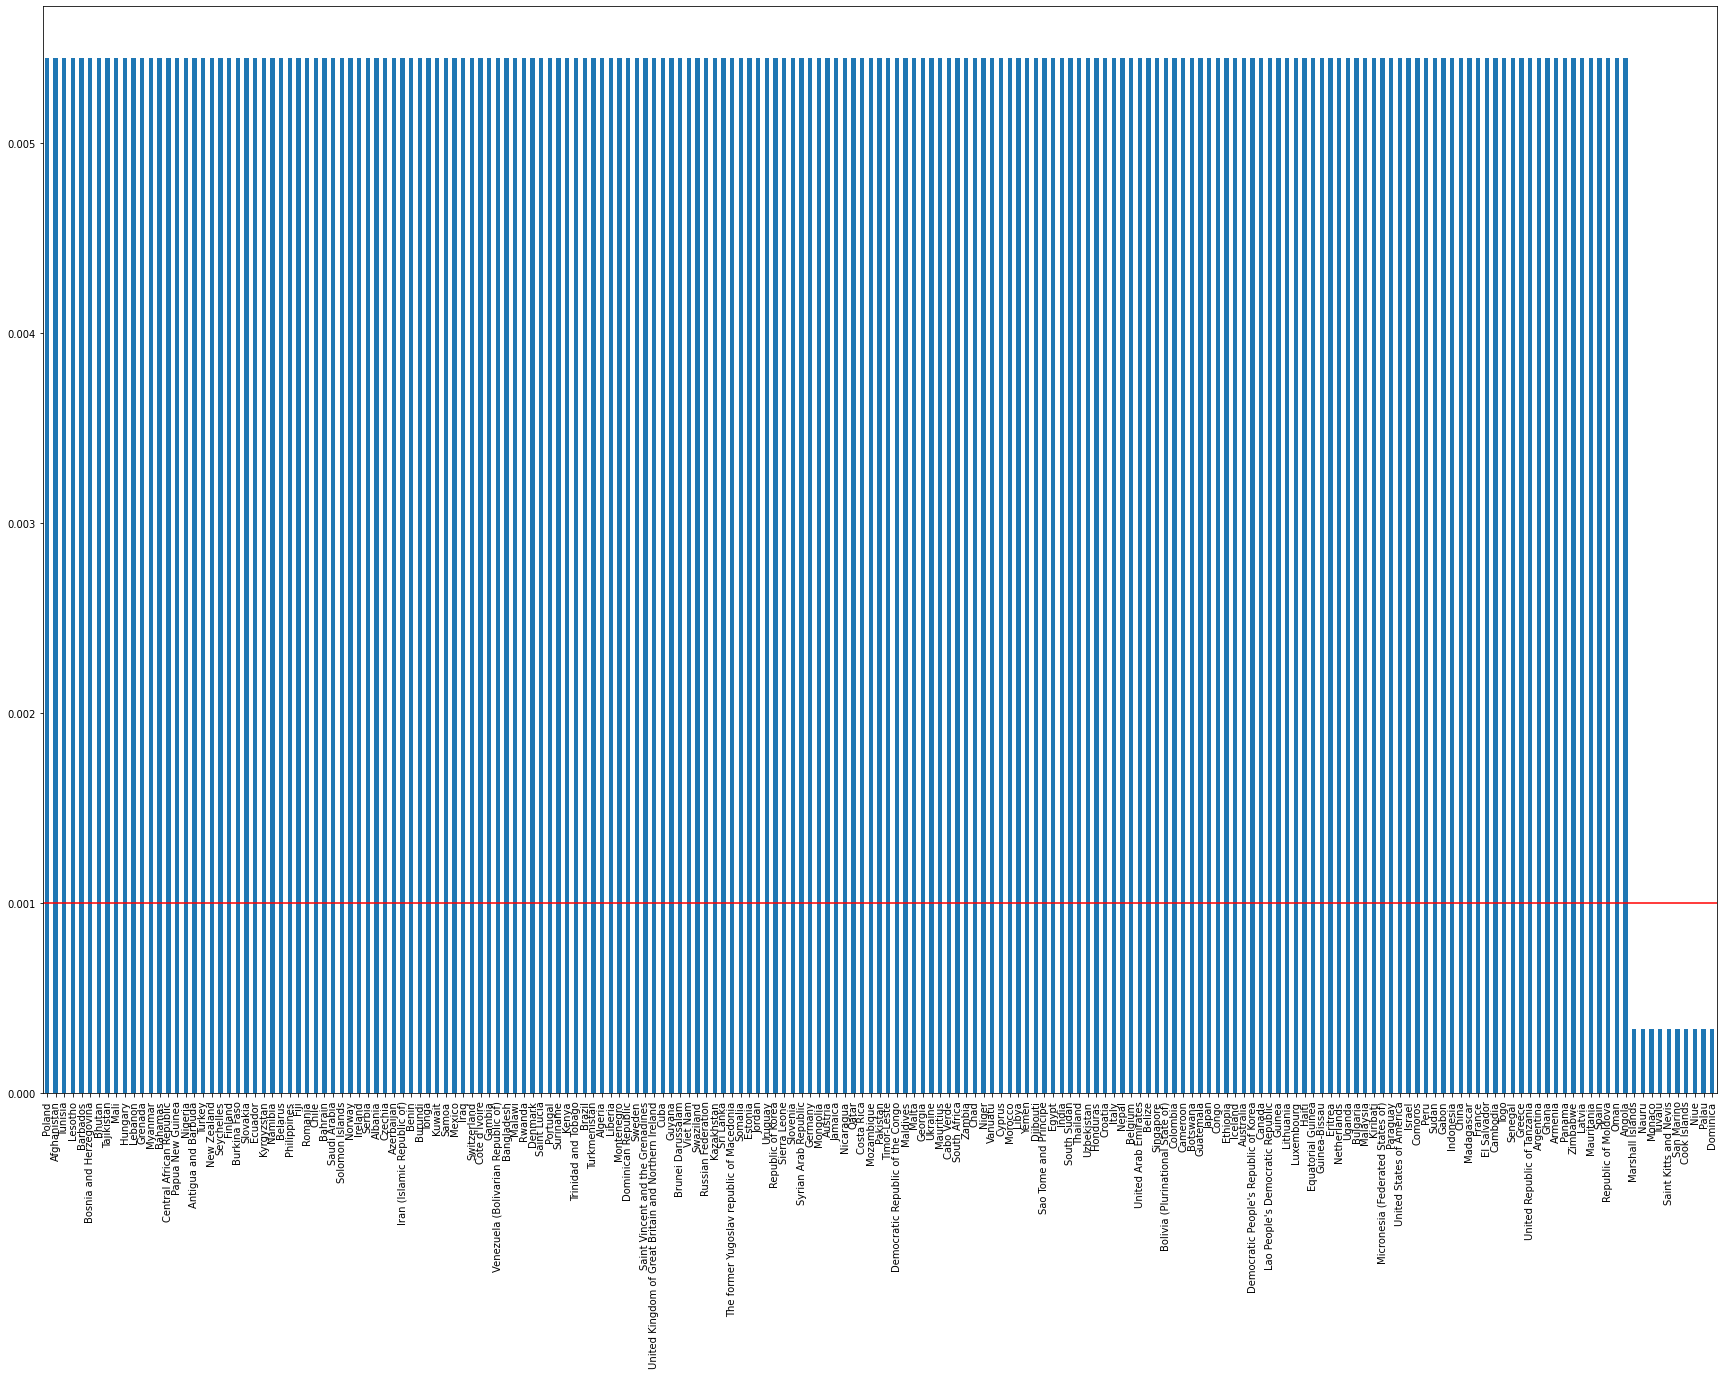

In [47]:
temp_df = pd.Series(data_encoding.Country.value_counts()/len(data))
temp_df.sort_values(ascending=False).plot.bar(figsize= (30,20))
plt.axhline(y=0.001, color='red')

In [48]:
unique_to_train_set = [
    x for x in X_train['Country'].unique() if x not in X_test['Country'].unique()
]

print(unique_to_train_set)

['Saudi Arabia', 'Saint Kitts and Nevis', 'San Marino', 'Somalia', 'Palau', 'Tuvalu', 'Dominica', 'Marshall Islands', 'Niue', 'Nauru', 'Cook Islands']


In [49]:
unique_to_test_set = [
    x for x in X_test['Country'].unique() if x not in X_train['Country'].unique()
]

print(unique_to_test_set)

['Monaco']


In [50]:
group_rare = {k : ('rare' if k not in temp_df[temp_df >= 0.001].index else k) for k in temp_df.index}
data_encoding['Country'] = data_encoding['Country'].map(group_rare)

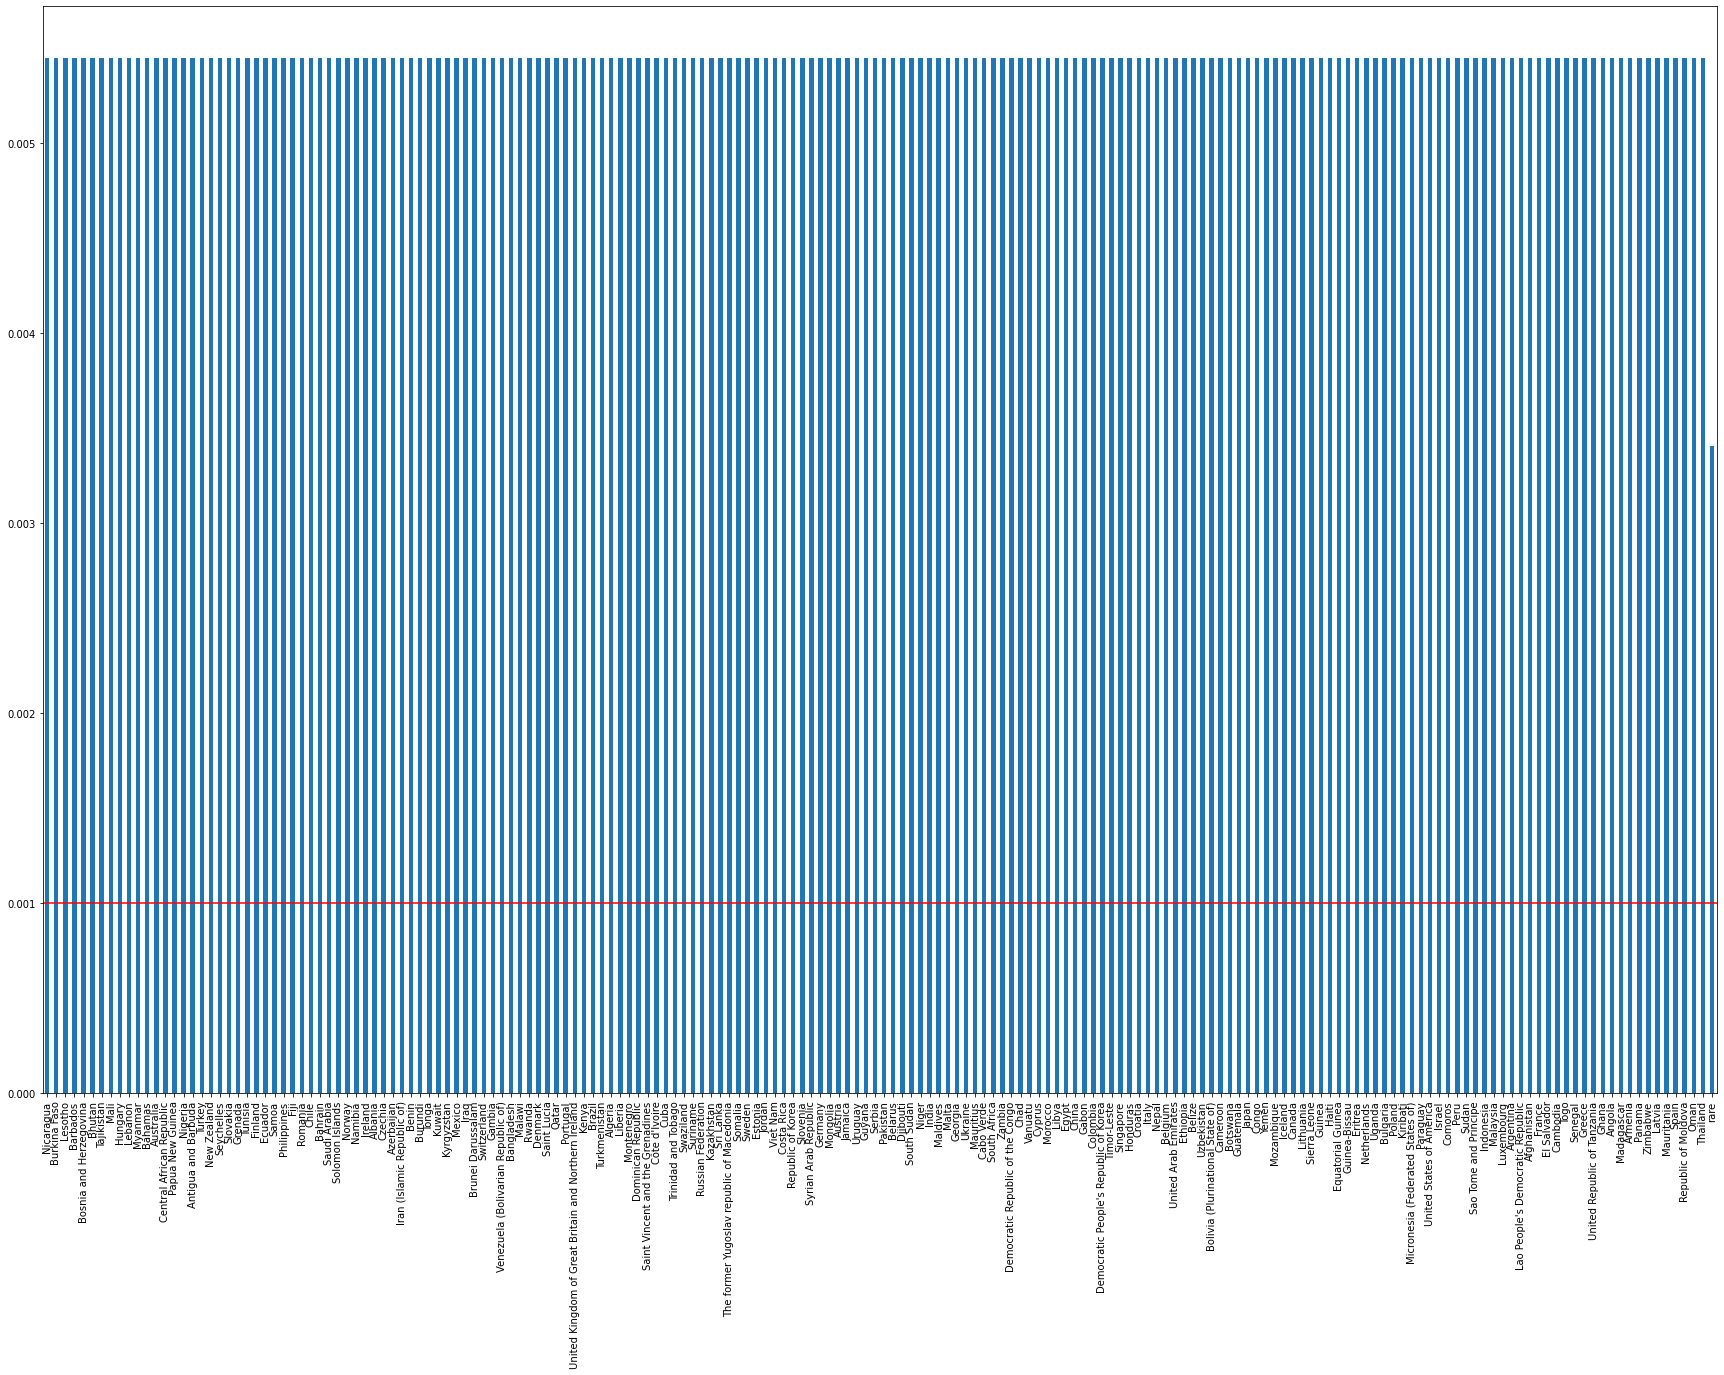

In [51]:
temp_df = pd.Series(data_encoding.Country.value_counts()/len(data))
temp_df.sort_values(ascending=False).plot.bar(figsize= (30,20))
plt.axhline(y=0.001, color='red')

Ta có thể thấy 2 variable 'Country' and 'Status' ta có thể mã hóa số nguyên mục tiêu cho 'Country' và mã hóa onehot cho biến 'Status'


In [52]:
!pip install feature_engine

     |████████████████████████████████| 180 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 21.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_encoding.drop('Life_expectancy',axis = 1),data_encoding['Life_expectancy'],test_size = 0.2,random_state=0)

In [54]:
numberic_variable = [col for col in X_train.columns if X_train[col].dtypes == 'int64' or X_train[col].dtypes == 'float64']
numberic_variable

['Year',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV_AIDS',
 'GDP',
 'Population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling']

In [55]:
from feature_engine.encoding import OrdinalEncoder

In [56]:
ordinal = OrdinalEncoder(encoding_method='ordered',variables=['Country'])

In [57]:
ordinal.fit(X_train,y_train)

OrdinalEncoder(variables=['Country'])

In [58]:
X_train = ordinal.transform(X_train)
X_test = ordinal.transform(X_test)

In [59]:
X_train.head()

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
683,157,2005,Developed,65.0,0,11.41,1562.520827,88.0,1,55.3,0,98.0,6.37,98.0,0.1,25324.48666,127658.0,0.9,1.0,0.826,13.5
478,51,2001,Developing,273.0,25,1.71,27.689711,0.0,3761,12.4,33,59.0,5.70,6.0,2.2,321.22634,1242473.0,11.6,11.8,0.412,7.6
2359,160,2001,Developed,124.0,0,10.80,196.302624,0.0,0,51.8,0,93.0,8.57,92.0,0.1,1479.29634,19926.0,2.2,2.2,0.824,14.7
971,34,2006,Developing,288.0,3,2.93,0.000000,95.0,0,21.5,6,94.0,5.52,95.0,3.0,-60.00000,0.0,9.0,8.9,0.415,8.1
880,137,2001,Developing,225.0,0,0.01,88.629458,0.0,0,54.3,0,94.0,4.85,94.0,0.1,4498.95727,1388115.0,2.4,2.5,0.781,15.0


In [60]:
from feature_engine.encoding import OneHotEncoder

In [61]:
OneHotEncoder??

In [62]:
onehot = OneHotEncoder(drop_last=True,variables=['Status'])

In [63]:
onehot.fit(X_train)

OneHotEncoder(drop_last=True, variables=['Status'])

In [64]:
onehot.encoder_dict_

{'Status': ['Developed']}

In [65]:
X_train = onehot.transform(X_train)
X_test = onehot.transform(X_test)

In [66]:
X_train

,Country,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Status_Developed
683,157,2005,65.0,0,11.41,1562.520827,88.0,1,55.3,0,98.0,6.37,98.0,0.1,25324.486660,127658.0,0.9,1.0,0.826,13.5,1
478,51,2001,273.0,25,1.71,27.689711,0.0,3761,12.4,33,59.0,5.70,6.0,2.2,321.226340,1242473.0,11.6,11.8,0.412,7.6,0
2359,160,2001,124.0,0,10.80,196.302624,0.0,0,51.8,0,93.0,8.57,92.0,0.1,1479.296340,19926.0,2.2,2.2,0.824,14.7,1
971,34,2006,288.0,3,2.93,0.000000,95.0,0,21.5,6,94.0,5.52,95.0,3.0,-60.000000,0.0,9.0,8.9,0.415,8.1,0
880,137,2001,225.0,0,0.01,88.629458,0.0,0,54.3,0,94.0,4.85,94.0,0.1,4498.957270,1388115.0,2.4,2.5,0.781,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,40,2005,318.0,2,1.23,12.703259,0.0,298,3.2,2,71.0,7.21,71.0,3.9,94.729749,783254.0,5.9,5.8,0.396,4.0,0
835,20,2014,32.0,3,0.01,13.404774,2.0,13,24.0,4,24.0,3.80,2.0,4.4,192.597330,1129424.0,8.5,8.4,0.582,9.2,0
1653,48,2013,28.0,8,0.01,8.880281,8.0,62,29.4,12,8.0,3.63,8.0,1.1,145.578380,394617.0,8.1,7.9,0.501,8.2,0
2607,53,2009,165.0,2,0.09,36.199487,72.0,10,15.1,3,78.0,1.20,72.0,0.1,757.311444,19221.0,11.6,11.6,0.599,12.1,0


Chuân hóa min-max

In [67]:
data_encoding.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
thinness_1_19_years                float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scale = MinMaxScaler()

In [70]:
scale.fit(X_train[numberic_variable])

MinMaxScaler()

In [71]:
X_train[numberic_variable] = scale.transform(X_train[numberic_variable])
X_test[numberic_variable] = scale.transform(X_test[numberic_variable])

Lựa chọn đặc trưng: Lasso,RecursiveFeatureAddition,RecursiveFeatureElimination

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [73]:
model_lasso = Lasso()

In [74]:
paramer = {'alpha':[0.01,0.5,1,10,100,1000]}
grid_lasso = GridSearchCV(model_lasso,paramer,cv = 5)

In [75]:
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.5, 1, 10, 100, 1000]})

In [76]:
grid_lasso.best_estimator_

Lasso(alpha=0.01)

In [77]:
model_lasso = SelectFromModel(Lasso(alpha=grid_lasso.best_params_['alpha'])).fit(X_train,y_train)

In [78]:
variable = X_train.columns[(model_lasso.get_support())]

In [79]:
X_train_lasso = X_train[variable]
X_test_lasso = X_test[variable]

In [80]:
from feature_engine.selection import RecursiveFeatureAddition
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
model_add = RecursiveFeatureAddition(GradientBoostingRegressor(n_estimators=10), scoring='r2',cv = 5).fit(X_train,y_train)

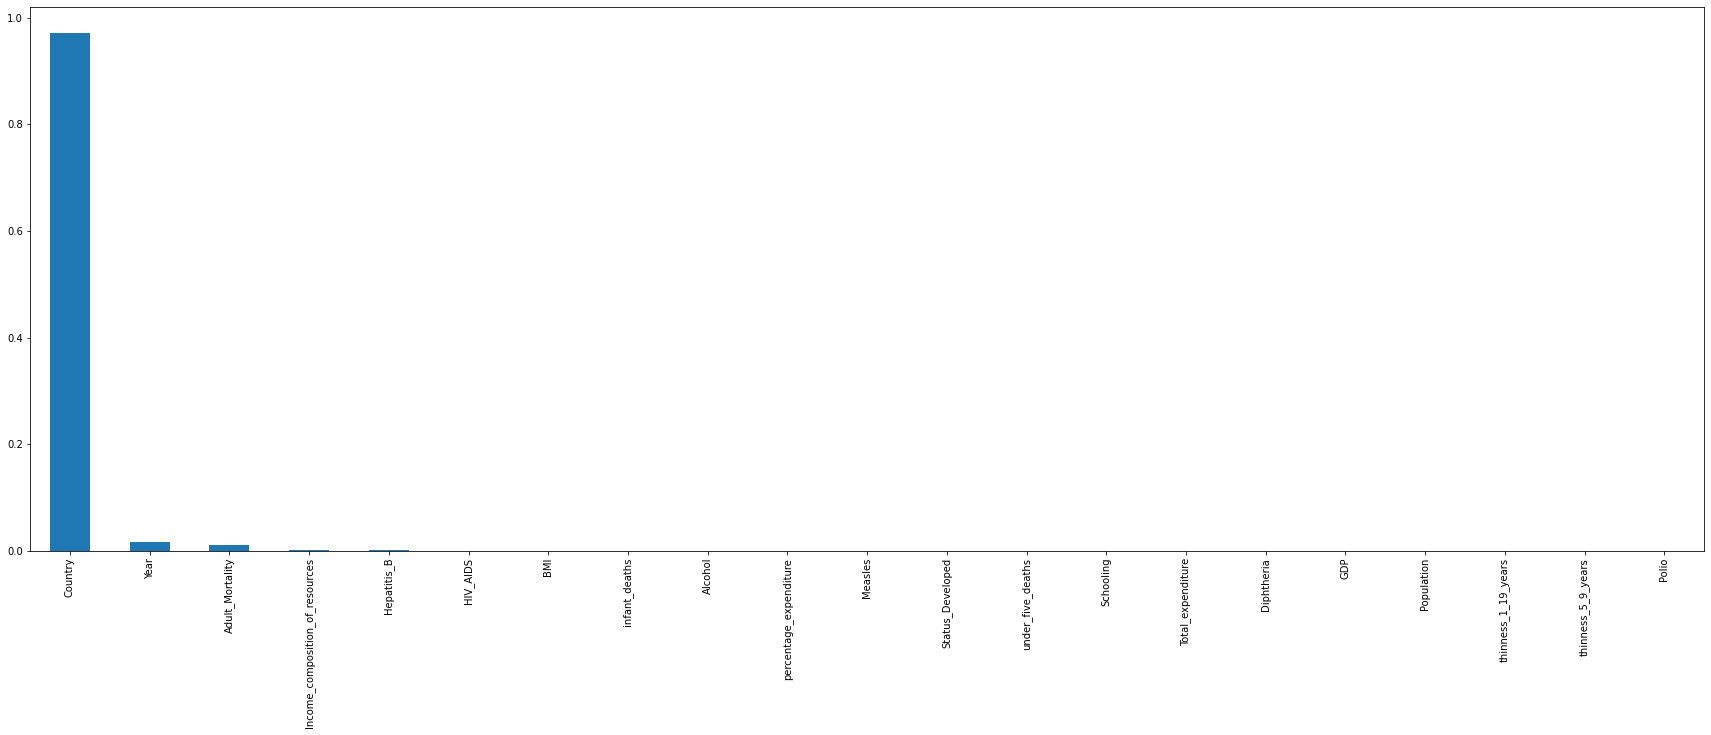

In [82]:
model_add.feature_importances_.plot.bar(figsize = (30,10))

In [83]:
model_add.features_to_drop_

['Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV_AIDS',
 'GDP',
 'Population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling',
 'Status_Developed']

In [84]:
X_train_add = model_add.transform(X_train)
X_test_add = model_add.transform(X_test)

In [85]:
from feature_engine.selection import RecursiveFeatureElimination

In [86]:
model_eli = RecursiveFeatureElimination(GradientBoostingRegressor(n_estimators=10),cv = 5,scoring='r2').fit(X_train,y_train)

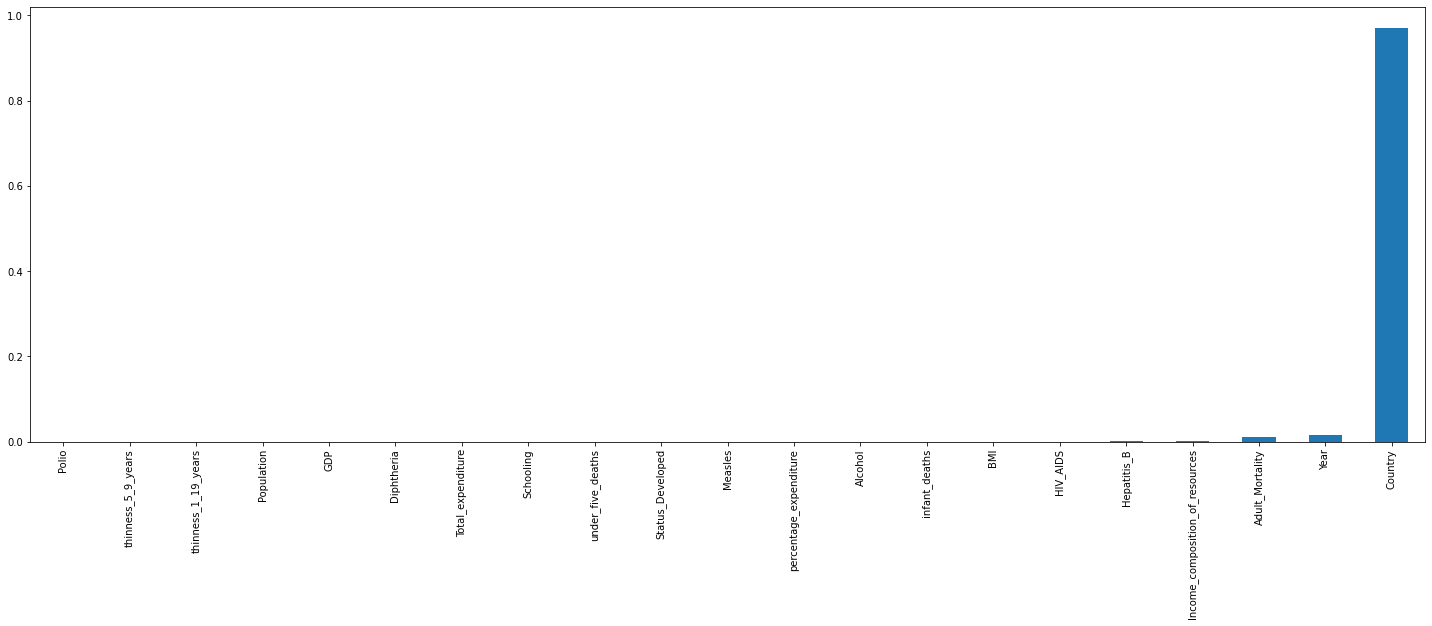

In [87]:
model_eli.feature_importances_.plot.bar(figsize = (25,8))

In [88]:
X_train_eli = model_eli.transform(X_train)
X_test_eli = model_eli.transform(X_test)

*evalueted*

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [97]:
def r2(model,X,y):
  cv = KFold(shuffle=True,n_splits=10)
  score = cross_val_score(model,X,y,cv = cv,scoring='r2')
  return score.mean(),score.std()

*Deploy*

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
model_elastic = ElasticNet()
print(f'Du lieu chon loc model LASSO {r2(model_elastic,X_train_lasso,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureAddition {r2(model_elastic,X_train_add,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureElimination {r2(model_elastic,X_train_eli,y_train)}')

Du lieu chon loc model LASSO (0.8721943526357828, 0.007936529353362415)
Du lieu chon loc model RecursiveFeatureAddition (0.8722428955083588, 0.008488538393379517)
Du lieu chon loc model RecursiveFeatureElimination (0.8719931346615878, 0.01511670760840328)


In [100]:
from sklearn.svm import SVR

In [101]:
model_svm = SVR()
print(f'Du lieu chon loc model LASSO {r2(model_svm,X_train_lasso,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureAddition {r2(model_svm,X_train_add,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureElimination {r2(model_svm,X_train_eli,y_train)}')

Du lieu chon loc model LASSO (0.9217979679641708, 0.014869703164033996)
Du lieu chon loc model RecursiveFeatureAddition (0.9223712080229461, 0.009806417782818589)
Du lieu chon loc model RecursiveFeatureElimination (0.9230137071177177, 0.009178581295752155)


In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
model_tree = DecisionTreeRegressor()
print(f'Du lieu chon loc model LASSO {r2(model_tree,X_train_lasso,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureAddition {r2(model_tree,X_train_add,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureElimination {r2(model_tree,X_train_eli,y_train)}')

Du lieu chon loc model LASSO (0.9467048259516325, 0.007117190598792193)
Du lieu chon loc model RecursiveFeatureAddition (0.9508336968378279, 0.013627708823492629)
Du lieu chon loc model RecursiveFeatureElimination (0.950073553234373, 0.01491847884182648)


In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
model_forest = RandomForestRegressor()
print(f'Du lieu chon loc model LASSO {r2(model_forest,X_train_lasso,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureAddition {r2(model_forest,X_train_add,y_train)}')
print(f'Du lieu chon loc model RecursiveFeatureElimination {r2(model_forest,X_train_eli,y_train)}')

Du lieu chon loc model LASSO (0.9730447923198285, 0.006393508290024236)
Du lieu chon loc model RecursiveFeatureAddition (0.9679460239945703, 0.01209089839293804)
Du lieu chon loc model RecursiveFeatureElimination (0.9680009892690581, 0.007979502516340766)


Tuning Hyperparamter

In [106]:
RandomForestRegressor??

In [108]:
model_forest = RandomForestRegressor()
paramter = {'n_estimators':[5,10,50,80,100,1000], 'max_depth':[4,8,12,20,25]}
cf = GridSearchCV(model_forest,param_grid=paramter,cv = 5,scoring='r2')

In [109]:
cf.fit(X_train_lasso,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12, 20, 25],
                         'n_estimators': [5, 10, 50, 80, 100, 1000]},
             scoring='r2')

In [111]:
cf.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [119]:
model_forest = RandomForestRegressor(n_estimators = cf.best_params_['n_estimators']).fit(X_train_lasso,y_train)

In [120]:
model_forest.predict(X_test_lasso[:5])

array([76.893, 66.273, 53.469, 62.552, 61.642])

In [121]:
y_test[:5]

867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
Name: Life_expectancy, dtype: float64

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test,model_forest.predict(X_test_lasso))

0.9678630706694361